In [1]:
!pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15900 sha256=a3ea7809efddc2e0e437271d740f7068f3809eb6eeebea3bdfaf2e1a71e6ea3f
  Stored in directory: /root/.cache/pip/wheels/c5/ca/73/5cdc3d087111bfbdef90be5457aa03c00c0e32241b2752445c
Successfully built pyforest


In [2]:
from sklearn.datasets import fetch_openml

In [3]:
df=fetch_openml('titanic',version=1,as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [30]:
df.data.shape

(1309, 13)

In [5]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


In [6]:
# finding missing value

df.data.isnull()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,True,False,True,True,True


In [8]:
df.data.isnull().sum().sum()


3855

In [10]:
import pyforest

In [11]:
sns.set()

<IPython.core.display.Javascript object>

In [39]:
# # Three ways to convert in Percentage

# x=pd.DataFrame((df.data.isnull().sum()/df.data.shape[0])*100)

# x=pd.DataFrame((df.data.isnull().sum()/len(df.data))*100)

# # with column name

# x=pd.DataFrame({
#     'Missing Percentage':(df.data.isnull().sum()/len(df.data))*100
# })

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:

miss_per=pd.DataFrame((df.data.isnull().sum()/df.data.shape[0])*100)
miss_per

<IPython.core.display.Javascript object>

,0
pclass,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.076394
cabin,77.463713
embarked,0.152788


In [41]:
miss_per=pd.DataFrame({"Missing Percentage":(df.data.isnull().sum()/len(df.data)*100
)})
miss_per


<IPython.core.display.Javascript object>

,Missing Percentage
pclass,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.076394
cabin,77.463713
embarked,0.152788


<IPython.core.display.Javascript object>

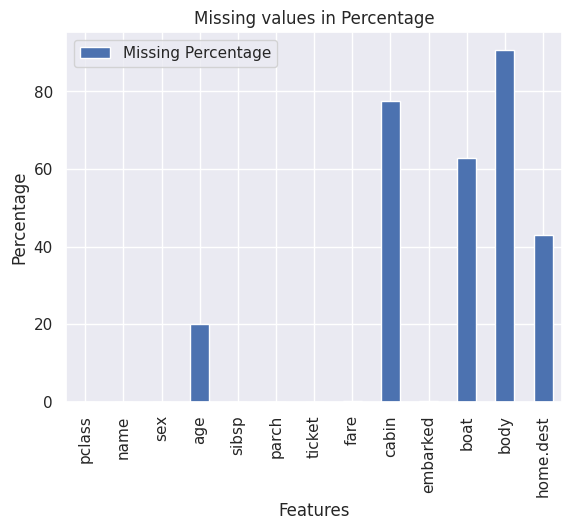

In [42]:
miss_per.plot(kind='bar',ylabel='Percentage',xlabel='Features',title='Missing values in Percentage')
plt.show()

In [44]:
print("size of dataset",df.data.shape)
print("size of target",df.target.shape)

size of dataset (1309, 13)
size of target (1309,)


In [46]:
#drop column

df.data.drop(['body'],axis=1,inplace=True)
print("size of dataset",df.data.shape)

size of dataset (1309, 12)


<ipython-input-46-ccd3f0567a91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(['body'],axis=1,inplace=True)
